In [1]:
import sys
import os

codebase_dir = "/home/yoyomanzoor/Documents/get_multimodel"

# Add project root to Python path so Hydra can find the model targets
PROJECT_ROOT = codebase_dir
if PROJECT_ROOT not in sys.path:
        sys.path.insert(0, PROJECT_ROOT)
        os.chdir(PROJECT_ROOT)

from get_model.config.config import export_config, load_config, load_config_from_yaml
from get_model.run_region import run_zarr as run

/home/yoyomanzoor/Crucial/get/lib/python3.12/site-packages/seqlogo/seqlogo.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/home/yoyomanzoor/Crucial/get/lib/python3.12/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


In [2]:
project_name = "pretrain_diffusion_testing"
scratch_dir = "/home/yoyomanzoor/Crucial/get_data"
data_path = f"{scratch_dir}/annotation_dir/pbmc10k_multiome.zarr"
checkpoint_path = f"{codebase_dir}/tutorials/checkpoint-799.pth"
run_name = "pretrain_GETDiffusion"
output_dir = f"{scratch_dir}/{run_name}/output"
config_path = f"tutorials/yamls/{run_name}.yaml"

In [3]:
# Predefined configuration
celltype_for_modeling = [
    'memory_b',
    'cd14_mono',
    'gdt',
    'cd8_tem_1',
    'naive_b',
    'mait',
    'intermediate_b',
    'cd4_naive',
    'cd8_tem_2',
    'cd8_naive',
    'cd4_tem',
    'cd4_tcm',
    'cd16_mono',
    'nk',
    'cdc',
    'treg']
cfg = load_config('pretrain_tutorial') # load the predefined finetune tutorial config
cfg.run.project_name = project_name # this is a unique name for this project
cfg.training.warmup_epochs = 10
cfg.dataset.leave_out_celltypes = 'cd8_tem_1'
cfg.dataset.zarr_path = data_path # the tutorial data which contains astrocyte atac & rna
cfg.dataset.celltypes = ','.join(celltype_for_modeling) # the celltypes you want to pretrain
cfg.dataset.leave_out_chromosomes = None # pretrain on all chromosomes
cfg.run.use_wandb=True # this is a logging system, you can turn it off by setting it to False
cfg.training.epochs = 20 # this is the number of epochs you want to train for
cfg.training.val_check_interval = 1.0 # validation check every epochs; this is for mac because the evaluation step is slow on it somehow...

In [4]:
# Model selection
cfg.model = load_config_from_yaml('get_model/config/model/GETDiffusion.yaml').model
cfg.dataset.mask_ratio = 0.5 # mask 50% of the motifs. This has to be set for pretrain dataloader to generate proper mask

In [5]:
# Train the model without the pretrain checkpoint
cfg.run.run_name = run_name
cfg.machine.codebase = codebase_dir
cfg.machine.output_dir = output_dir
cfg.dataset.zarr_path = data_path
cfg.finetune.checkpoint = checkpoint_path
cfg.finetune.model_key = "model"
cfg.finetune.rename_config = {
  "encoder.head.": "head_mask.",
  "encoder.region_embed": "region_embed",
  "region_embed.proj.": "region_embed.embed.",
  "encoder.cls_token": "cls_token",
}
# strict=False allows loading base model weights while leaving diffusion components randomly initialized
cfg.finetune.strict = False
cfg.finetune.use_lora = False
# cfg.finetune.layers_with_lora = ['region_embed', 'encoder']

In [6]:
# Export the final configuration to a yaml file
export_config(cfg, config_path)

cfg = load_config_from_yaml(config_path)

Load ckpt from /home/yoyomanzoor/Documents/get_multimodel/tutorials/checkpoint-799.pth
Load state_dict by model_key = model


wandb: Currently logged in as: smanzoor (smanzoor-university-of-michigan) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


 13%|█▎        | 2/15 [00:00<00:01, 10.22it/s]

Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']


 27%|██▋       | 4/15 [00:00<00:00, 12.46it/s]

Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']


 53%|█████▎    | 8/15 [00:00<00:00, 12.39it/s]

Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']


 67%|██████▋   | 10/15 [00:00<00:00, 12.01it/s]

Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']


 93%|█████████▎| 14/15 [00:01<00:00, 11.35it/s]

Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']


100%|██████████| 1/1 [00:00<00:00, 12.19it/s]
/home/yoyomanzoor/Crucial/get/lib/python3.12/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:751: Checkpoint directory /home/yoyomanzoor/Crucial/get_data/pretrain_GETDiffusion/output/pretrain_diffusion_testing/pretrain_GETDiffusion/checkpoints exists and is not empty.


Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

epoch,▁▁▁▁▁▁▁▁▁▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
masked_mse,█▅▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▂
masked_pearson,▃▁▄▄▄▄▄▅▅▇▆▇▇▇▆▇█▅▅▃
masked_r2,▁▄▆▇▇▇█████████████▇
train_loss,█▅▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_masked_loss,█▅▆▄▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▆▆▆▆▆▆▆▇▇█████
val_loss,█▅▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▂
val_masked_loss,█▅▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▂
epoch,19
masked_mse,1.3102


{'train_masked_loss': tensor(0.1948),
 'train_loss': tensor(0.1948),
 'val_masked_loss': tensor(1.3102),
 'masked_pearson': tensor(0.0155),
 'masked_mse': tensor(1.3102),
 'masked_r2': tensor(-209.3268),
 'val_loss': tensor(1.3102)}

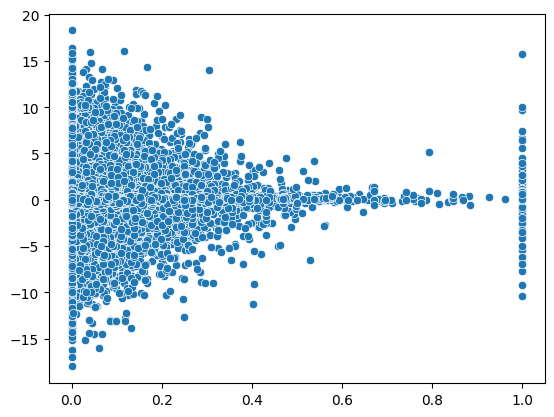

In [7]:
# Train
trainer = run(cfg)
trainer.callback_metrics

Load ckpt from /home/yoyomanzoor/Documents/get_multimodel/tutorials/checkpoint-799.pth
Load state_dict by model_key = model


 14%|█▍        | 2/14 [00:00<00:01, 10.91it/s]

Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']


 29%|██▊       | 4/14 [00:00<00:00, 13.01it/s]

Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']


 57%|█████▋    | 8/14 [00:00<00:00, 12.63it/s]

Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']


 71%|███████▏  | 10/14 [00:00<00:00, 12.26it/s]

Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']


100%|██████████| 14/14 [00:01<00:00, 12.29it/s]


Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']


100%|██████████| 2/2 [00:00<00:00, 11.29it/s]


Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

epoch,▁▁▁▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇███
masked_mse,█▅▄▆▃▃▂▄▂▄▃▂▄▄▂▂▂▁▂▂
masked_pearson,▁▄▄▃▅▆▆▆▆▆▇▇▇▇▇█▇███
masked_r2,▁▄▅▄▅▆▆▆▆▆▇▇▇▇▇█▇███
train_loss,▅▅▃▆▅▄▄▆▄▂▆█▃▅▄▆▃▅█▆▃▃▃▅▅▅█▃▇▃▂▃▄▁▃▆▅▇▃▂
train_masked_loss,█▂▁▂▂▂▁▁▁▁▂▂▁▁▁▂▂▁▂▁▂▁▂▁▁▂▂▁▂▁▁▂▁▂▁▁▂▁▁▁
trainer/global_step,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇█
val_loss,█▅▄▆▃▃▂▄▂▄▃▂▄▄▂▂▂▁▂▂
val_masked_loss,█▅▄▆▃▃▂▄▂▄▃▂▄▄▂▂▂▁▂▂
epoch,19
masked_mse,0.00119


{'train_masked_loss': tensor(0.0013),
 'train_loss': tensor(0.0013),
 'val_masked_loss': tensor(0.0012),
 'masked_pearson': tensor(0.8003),
 'masked_mse': tensor(0.0012),
 'masked_r2': tensor(0.6405),
 'val_loss': tensor(0.0012)}

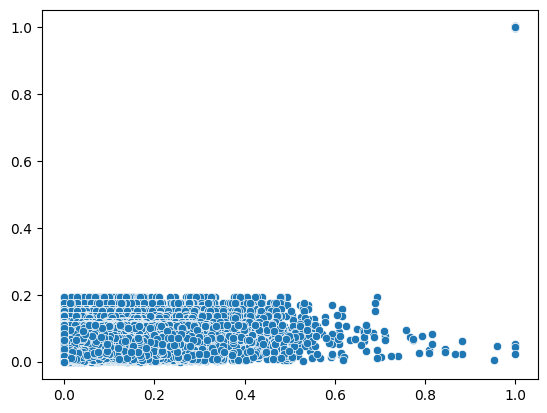

In [8]:
project_name = "pretrain_diffusion_testing"
scratch_dir = "/home/yoyomanzoor/Crucial/get_data"
data_path = f"{scratch_dir}/annotation_dir/pbmc10k_multiome.zarr"
checkpoint_path = f"{codebase_dir}/tutorials/checkpoint-799.pth"
run_name = "pretrain_GETDiffusion_old"
output_dir = f"{scratch_dir}/{run_name}/output"
config_path = f"tutorials/yamls/{run_name}.yaml"

# Predefined configuration
celltype_for_modeling = [
    'memory_b',
    'cd14_mono',
    'gdt',
    'cd8_tem_1',
    'naive_b',
    'mait',
    'intermediate_b',
    'cd4_naive',
    'cd8_tem_2',
    'cd8_naive',
    'cd4_tem',
    'cd4_tcm',
    'cd16_mono',
    'nk',
    'cdc',
    'treg']
cfg = load_config('pretrain_tutorial') # load the predefined finetune tutorial config
cfg.run.project_name = project_name # this is a unique name for this project
cfg.training.warmup_epochs = 10
cfg.dataset.leave_out_celltypes = ",".join(['cd8_tem_1', 'cd8_naive'])
cfg.dataset.zarr_path = data_path # the tutorial data which contains astrocyte atac & rna
cfg.dataset.celltypes = ','.join(celltype_for_modeling) # the celltypes you want to pretrain
cfg.dataset.leave_out_chromosomes = None # pretrain on all chromosomes
cfg.run.use_wandb=True # this is a logging system, you can turn it off by setting it to False
cfg.training.epochs = 20 # this is the number of epochs you want to train for
cfg.training.val_check_interval = 1.0 # validation check every epochs; this is for mac because the evaluation step is slow on it somehow...

# Model selection
cfg.model = load_config_from_yaml('get_model/config/model/GETDiffusionOld.yaml').model
cfg.dataset.mask_ratio = 0.5 # mask 50% of the motifs. This has to be set for pretrain dataloader to generate proper mask

# Train the model without the pretrain checkpoint
cfg.run.run_name = run_name
cfg.machine.codebase = codebase_dir
cfg.machine.output_dir = output_dir
cfg.dataset.zarr_path = data_path
cfg.finetune.checkpoint = checkpoint_path
cfg.finetune.model_key = "model"
cfg.finetune.rename_config = {
  "encoder.head.": "head_mask.",
  "encoder.region_embed": "region_embed",
  "region_embed.proj.": "region_embed.embed.",
  "encoder.cls_token": "cls_token",
}
# strict=False allows loading base model weights while leaving diffusion components randomly initialized
cfg.finetune.strict = False
cfg.finetune.use_lora = False
# cfg.finetune.layers_with_lora = ['region_embed', 'encoder']

# Export the final configuration to a yaml file
export_config(cfg, config_path)
cfg = load_config_from_yaml(config_path)

# Train
trainer = run(cfg)
trainer.callback_metrics

Load ckpt from /home/yoyomanzoor/Documents/get_multimodel/tutorials/checkpoint-799.pth
Load state_dict by model_key = model


 14%|█▍        | 2/14 [00:00<00:01, 10.86it/s]

Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']


 29%|██▊       | 4/14 [00:00<00:00, 12.99it/s]

Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']


 57%|█████▋    | 8/14 [00:00<00:00, 12.65it/s]

Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']


 71%|███████▏  | 10/14 [00:00<00:00, 12.28it/s]

Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']


100%|██████████| 14/14 [00:01<00:00, 12.23it/s]


Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']


100%|██████████| 2/2 [00:00<00:00, 11.33it/s]


Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

epoch,▁▁▁▁▁▁▂▂▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇████
masked_mse,█▅▆▃▄▄▄▅▂▂▁▃▅▂▃▂▂▂▄▃
masked_pearson,▁▃▄▆▅▅▅▅▇▇█▆▄█▆█▇█▆▆
masked_r2,▁▄▄▆▅▅▅▅▇▇█▆▄█▆█▇█▆▆
train_loss,▅▂▃▃▁▃▂█▂▃▂▂▁▃▂▃▃▂▂▃▂▂▃▄▁▂▃▁▂▄▃▃▁▂▁▃▁▂▂▂
train_masked_loss,▇▂▄▂▂▁▂▁▁▁▂█▂▃▂▂▃▃▁▃▃▃▃▂▂▃▂▃▂▃▂▁▃▁▂▁▁▂▃▁
trainer/global_step,▁▁▁▂▂▃▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇█
val_loss,█▅▆▃▄▄▄▅▂▂▁▃▅▂▃▂▂▂▄▃
val_masked_loss,█▅▆▃▄▄▄▅▂▂▁▃▅▂▃▂▂▂▄▃
epoch,19
masked_mse,0.0024


{'train_masked_loss': tensor(0.0025),
 'train_loss': tensor(0.0025),
 'val_masked_loss': tensor(0.0024),
 'masked_pearson': tensor(0.7803),
 'masked_mse': tensor(0.0024),
 'masked_r2': tensor(0.6088),
 'val_loss': tensor(0.0024)}

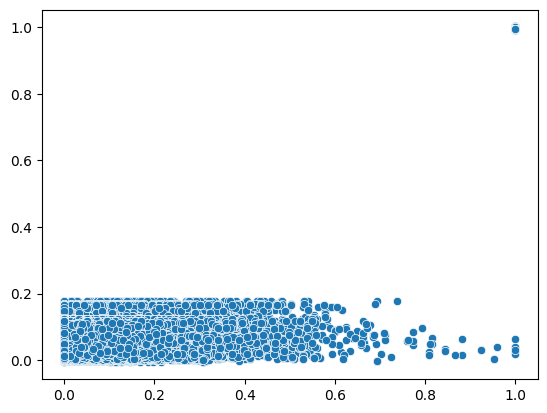

In [9]:
project_name = "pretrain_diffusion_testing"
scratch_dir = "/home/yoyomanzoor/Crucial/get_data"
data_path = f"{scratch_dir}/annotation_dir/pbmc10k_multiome.zarr"
checkpoint_path = f"{codebase_dir}/tutorials/checkpoint-799.pth"
run_name = "pretrain_GET"
output_dir = f"{scratch_dir}/{run_name}/output"
config_path = f"tutorials/yamls/{run_name}.yaml"

# Predefined configuration
celltype_for_modeling = [
    'memory_b',
    'cd14_mono',
    'gdt',
    'cd8_tem_1',
    'naive_b',
    'mait',
    'intermediate_b',
    'cd4_naive',
    'cd8_tem_2',
    'cd8_naive',
    'cd4_tem',
    'cd4_tcm',
    'cd16_mono',
    'nk',
    'cdc',
    'treg']
cfg = load_config('pretrain_tutorial') # load the predefined finetune tutorial config
cfg.run.project_name = project_name # this is a unique name for this project
cfg.training.warmup_epochs = 10
cfg.dataset.leave_out_celltypes = ",".join(['cd8_tem_1', 'cd8_naive'])
cfg.dataset.zarr_path = data_path # the tutorial data which contains astrocyte atac & rna
cfg.dataset.celltypes = ','.join(celltype_for_modeling) # the celltypes you want to pretrain
cfg.dataset.leave_out_chromosomes = None # pretrain on all chromosomes
cfg.run.use_wandb=True # this is a logging system, you can turn it off by setting it to False
cfg.training.epochs = 20 # this is the number of epochs you want to train for
cfg.training.val_check_interval = 1.0 # validation check every epochs; this is for mac because the evaluation step is slow on it somehow...

# Model selection
cfg.model = load_config('model/GETRegionPretrain').model.model
cfg.dataset.mask_ratio = 0.5 # mask 50% of the motifs. This has to be set for pretrain dataloader to generate proper mask

# Train the model without the pretrain checkpoint
cfg.run.run_name = run_name
cfg.machine.codebase = codebase_dir
cfg.machine.output_dir = output_dir
cfg.dataset.zarr_path = data_path
cfg.finetune.checkpoint = checkpoint_path
cfg.finetune.model_key = "model"
cfg.finetune.rename_config = {
  "encoder.head.": "head_mask.",
  "encoder.region_embed": "region_embed",
  "region_embed.proj.": "region_embed.embed.",
  "encoder.cls_token": "cls_token",
}
# strict=False allows loading base model weights while leaving diffusion components randomly initialized
cfg.finetune.strict = False
cfg.finetune.use_lora = False
# cfg.finetune.layers_with_lora = ['region_embed', 'encoder']

# Export the final configuration to a yaml file
export_config(cfg, config_path)
cfg = load_config_from_yaml(config_path)

# Train
trainer = run(cfg)
trainer.callback_metrics

Using checkpoint: /home/yoyomanzoor/greatlakes/diffusion-best-v1.ckpt
Output path: /home/yoyomanzoor/Crucial/get_data/output/finetune_pbmc10k_multiome_GET/finetune_from_GETDiffusion_checkpoint
Training for 20 epochs
Checkpoint: /home/yoyomanzoor/greatlakes/diffusion-best-v1.ckpt
Configuration exported to get_model/config/finetune_GETDiffusion_config.yaml
Finetune config:
  Model key: model
  Strict loading: False
  Patterns to drop: ['head_mask.']
  Rename config: {'blocks.': 'encoder.blocks.', 'fc_norm.': 'encoder.norm.', 'encoder.head.': 'head_mask.', 'encoder.region_embed': 'region_embed', 'region_embed.proj.': 'region_embed.embed.', 'encoder.cls_token': 'cls_token', 'head.': 'head_exp.head.'}
Default checkpoint path is at: /home/yoyomanzoor/Crucial/get_data/output/finetune_pbmc10k_multiome_GET/finetune_from_GETDiffusion_checkpoint/checkpoints/best.ckpt
The `trainer.checkpoint_callback.best_model_path` variable will be updated to the checkpoint path after training


/home/yoyomanzoor/Crucial/get/lib/python3.12/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Metric `SpearmanCorrcoef` will save all targets and predictions in the buffer. For large datasets, this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


Load ckpt from /home/yoyomanzoor/greatlakes/diffusion-best-v1.ckpt


wandb: Currently logged in as: smanzoor (smanzoor-university-of-michigan) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


 13%|█▎        | 2/15 [00:00<00:01, 10.47it/s]

Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']


 27%|██▋       | 4/15 [00:00<00:00, 12.14it/s]

Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']


 53%|█████▎    | 8/15 [00:00<00:00, 11.96it/s]

Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']


 67%|██████▋   | 10/15 [00:00<00:00, 11.95it/s]

Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']


 93%|█████████▎| 14/15 [00:01<00:00, 11.52it/s]

Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']


100%|██████████| 1/1 [00:00<00:00, 10.02it/s]


Leave out chromosomes: []
Input chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

SystemExit: 1

/home/yoyomanzoor/Crucial/get/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3707: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


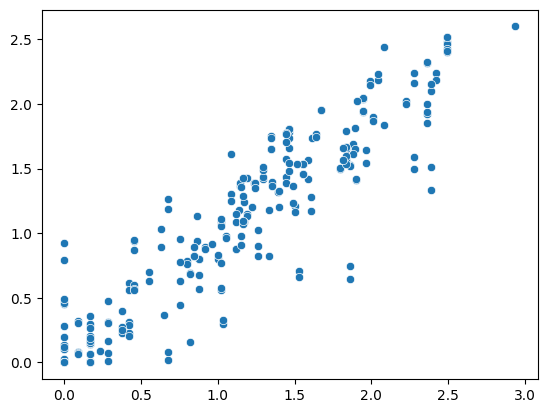

Error in callback <bound method _WandbInit._post_run_cell_hook of <wandb.sdk.wandb_init._WandbInit object at 0x7f92d82602c0>> (for post_run_cell), with arguments args (<ExecutionResult object at 7f92dae8ddf0, execution_count=7 error_before_exec=None error_in_exec=1 info=<ExecutionInfo object at 7f92d96e5880, raw_cell="from pathlib import Path
import os
import sys

# A.." transformed_cell="from pathlib import Path
import os
import sys

# A.." store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell:/home/yoyomanzoor/Documents/get_multimodel/notebooks/pretrain_GETDiffusion.ipynb#X12sZmlsZQ%3D%3D> result=None>,),kwargs {}:


ConnectionResetError: Connection lost

In [7]:
from pathlib import Path
import os
import sys

# Add project root to Python path
PROJECT_ROOT = "/home/yoyomanzoor/Documents/get_multimodel"
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)
    os.chdir(PROJECT_ROOT)

import matplotlib.pyplot as plt
import seaborn as sns
from gcell.utils.causal_lib import get_subnet, plot_comm, preprocess_net

from get_model.config.config import load_config, export_config, load_config_from_yaml
from get_model.run_region import run_zarr as run

yaml_path = "get_model/config/finetune_GETDiffusion_config.yaml"

# Set up data paths
data_dir = "/home/yoyomanzoor/Crucial/get_data"
annotation_dir = data_dir + '/annotation_dir'

# Checkpoint path
checkpoint_path = os.path.expanduser("~/greatlakes/diffusion-best-v1.ckpt")
print(f"Using checkpoint: {checkpoint_path}")
assert Path(checkpoint_path).exists(), f"Checkpoint not found at {checkpoint_path}"

# Load the predefined finetune tutorial config
# cfg = load_config_from_yaml('get_model/config/finetune_GETDiffusion.yaml')
cfg = load_config('finetune_tutorial_pbmc')
cfg.stage = 'fit'
cfg.run.project_name = 'finetune_pbmc10k_multiome_GET'
cfg.run.run_name = 'finetune_from_GETDiffusion_checkpoint'
cfg.dataset.quantitative_atac = False  # We use binary ATAC signal for motif interpretation analysis
cfg.dataset.zarr_path = f"{annotation_dir}/pbmc10k_multiome.zarr"
cfg.dataset.celltypes = ','.join(celltype_for_modeling)
cfg.dataset.leave_out_celltypes = 'cd4_tcm'  # Leave out celltype for evaluation
cfg.finetune.checkpoint = checkpoint_path
cfg.training.epochs = 20
cfg.machine.codebase = PROJECT_ROOT
cfg.machine.num_devices = 1  # use 0 for cpu training; >=1 for gpu training
cfg.machine.batch_size = 8  # batch size for training
cfg.machine.output_dir = f"{data_dir}/output"

print(f"Output path: {cfg.machine.output_dir}/{cfg.run.project_name}/{cfg.run.run_name}")
print(f"Training for {cfg.training.epochs} epochs")
print(f"Checkpoint: {cfg.finetune.checkpoint}")

cfg.model = load_config_from_yaml('get_model/config/model/GETRegionFinetuneDiffusion.yaml').model

# Export the config to a yaml file
export_config(cfg, yaml_path)
print(f"Configuration exported to {yaml_path}")
# Load the config from the yaml file
cfg = load_config_from_yaml(yaml_path)

# Configure finetune settings for loading pretrain checkpoint
# The pretrain checkpoint (GETRegionPretrain) has head_mask, but finetune model (GETRegionFinetune) needs head_exp
cfg.finetune.model_key = "model"  # Key for model in checkpoint (as set in run_pretrain.py)
cfg.finetune.strict = False  # Allow missing head_exp weights (pretrain has head_mask instead)
cfg.finetune.patterns_to_drop = ["head_mask."]  # Drop head_mask weights (not used in finetune model)
# Set rename_config to map pretrain checkpoint structure to finetune model structure
if cfg.finetune.rename_config is None:
    cfg.finetune.rename_config = {}
# Ensure region_embed and encoder mappings are correct (if needed)
cfg.finetune.rename_config.setdefault("encoder.region_embed", "region_embed")
cfg.finetune.rename_config.setdefault("region_embed.proj.", "region_embed.embed.")
cfg.finetune.rename_config.setdefault("encoder.cls_token", "cls_token")

print(f"Finetune config:")
print(f"  Model key: {cfg.finetune.model_key}")
print(f"  Strict loading: {cfg.finetune.strict}")
print(f"  Patterns to drop: {cfg.finetune.patterns_to_drop}")
print(f"  Rename config: {cfg.finetune.rename_config}")

print(f"Default checkpoint path is at: {cfg.machine.output_dir}/{cfg.run.project_name}/{cfg.run.run_name}/checkpoints/best.ckpt")
print("The `trainer.checkpoint_callback.best_model_path` variable will be updated to the checkpoint path after training")

# Run the finetuning
trainer = run(cfg)
print("Checkpoint path:", trainer.checkpoint_callback.best_model_path)